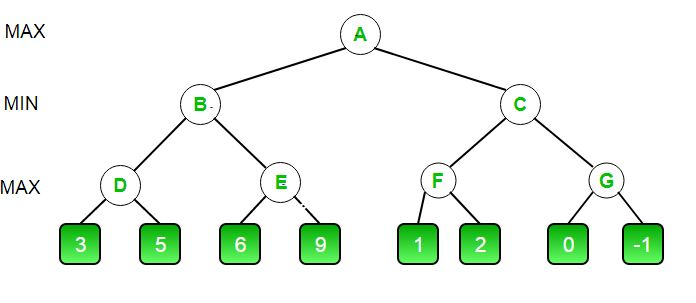

The initial call starts from A. The value of alpha here is -INFINITY and the value of beta is +INFINITY. These values are passed down to subsequent nodes in the tree. At A the maximizer must choose max of B and C, so A calls B first
At B it the minimizer must choose min of D and E and hence calls D first.
At D, it looks at its left child which is a leaf node. This node returns a value of 3. Now the value of alpha at D is max( -INF, 3) which is 3.
To decide whether its worth looking at its right node or not, it checks the condition beta<=alpha. This is false since beta = +INF and alpha = 3. So it continues the search.
D now looks at its right child which returns a value of 5.At D, alpha = max(3, 5) which is 5. Now the value of node D is 5
D returns a value of 5 to B. At B, beta = min( +INF, 5) which is 5. The minimizer is now guaranteed a value of 5 or lesser. B now calls E to see if he can get a lower value than 5.
At E the values of alpha and beta is not -INF and +INF but instead -INF and 5 respectively, because the value of beta was changed at B and that is what B passed down to E
Now E looks at its left child which is 6. At E, alpha = max(-INF, 6) which is 6. Here the condition becomes true. beta is 5 and alpha is 6. So beta<=alpha is true. Hence it breaks and E returns 6 to B
Note how it did not matter what the value of E‘s right child is. It could have been +INF or -INF, it still wouldn’t matter, We never even had to look at it because the minimizer was guaranteed a value of 5 or lesser. So as soon as the maximizer saw the 6 he knew the minimizer would never come this way because he can get a 5 on the left side of B. This way we didn’t have to look at that 9 and hence saved computation time.
E returns a value of 6 to B. At B, beta = min( 5, 6) which is 5.The value of node B is also 5
So far this is how our game tree looks. The 9 is crossed out because it was never computed.

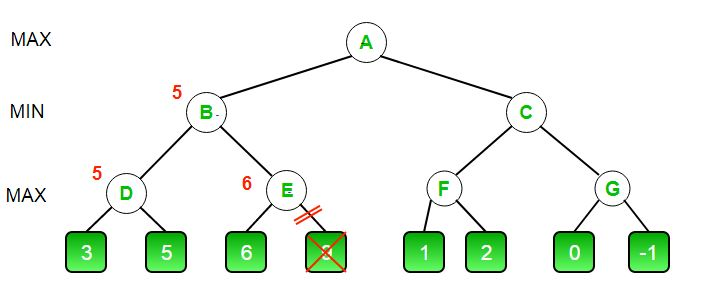

B returns 5 to A. At A, alpha = max( -INF, 5) which is 5. Now the maximizer is guaranteed a value of 5 or greater. A now calls C to see if it can get a higher value than 5.
At C, alpha = 5 and beta = +INF. C calls F
At F, alpha = 5 and beta = +INF. F looks at its left child which is a 1. alpha = max( 5, 1) which is still 5.
F looks at its right child which is a 2. Hence the best value of this node is 2. Alpha still remains 5
F returns a value of 2 to C. At C, beta = min( +INF, 2). The condition beta <= alpha becomes true as beta = 2 and alpha = 5. So it breaks and it does not even have to compute the entire sub-tree of G.
The intuition behind this break-off is that, at C the minimizer was guaranteed a value of 2 or lesser. But the maximizer was already guaranteed a value of 5 if he choose B. So why would the maximizer ever choose C and get a value less than 2 ? Again you can see that it did not matter what those last 2 values were. We also saved a lot of computation by skipping a whole sub-tree.
C now returns a value of 2 to A. Therefore the best value at A is max( 5, 2) which is a 5.
Hence the optimal value that the maximizer can get is 5
This is how our final game tree looks like. As you can see G has been crossed out as it was never computed.




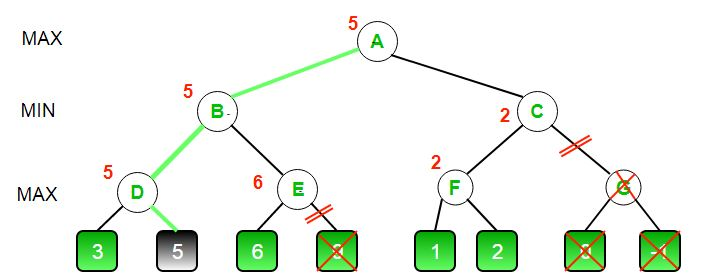

In [4]:

# Initial values of Alpha and Beta
MAX, MIN = 1000, -1000

# Returns optimal value for current player
#(Initially called for root and maximizer)
def minimax(depth, nodeIndex, maximizingPlayer,
			values, alpha, beta):

	# Terminating condition. i.e
	# leaf node is reached
	if depth == 3:
		return values[nodeIndex]

	if maximizingPlayer:

		best = MIN

		# Recur for left and right children
		for i in range(0, 2):

			val = minimax(depth + 1, nodeIndex * 2 + i,
						False, values, alpha, beta)
			best = max(best, val)
			alpha = max(alpha, best)

			# Alpha Beta Pruning
			if beta <= alpha:
				break

		return best

	else:
		best = MAX

		# Recur for left and
		# right children
		for i in range(0, 2):

			val = minimax(depth + 1, nodeIndex * 2 + i,
							True, values, alpha, beta)
			best = min(best, val)
			beta = min(beta, best)

			# Alpha Beta Pruning
			if beta <= alpha:
				break

		return best

# Driver Code
if __name__ == "__main__":

	values = [3, 5, 6, 9, 1, 2, 0, -1]
	print("The optimal value is :", minimax(0, 0, True, values, MIN, MAX))



The optimal value is : 5
